In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd

%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-07-20 21:03:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net) をDNSに問いあわせています... 67.228.254.193
s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 72629 (71K) [text/csv]
`FuelConsumption.csv' に保存中

FuelConsumption.csv 100%[===================>]  70.93K   308KB/s    時間 0.2s    

2019-07-20 21:03:16 (308 KB/s) - `FuelConsumption.csv' へ保存完了 [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


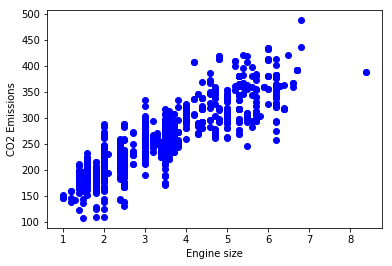

In [6]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
plt.show()

In [12]:
mask = np.random.rand(len(df)) < 0.8
#lend(df) -> 行数を取得。 len(df.columns)で列数を取得。 df.size->全要素数を取得 df.shape->行、列数を取得。
train = cdf[mask]
test = cdf[~mask]

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

In [17]:
#poly.fit_transform(train_x)で多項近似の係数をn行3列の行列に変換
#train_x_polyとyの線形近似として処理できる。
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.97342731 -1.31289969]]
Intercept:  [109.54913574]


Text(0,0.5,'Emission')

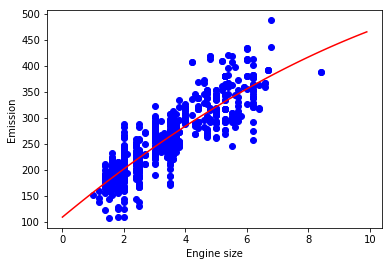

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
#np.power(XX, 2) -> XX^2
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [19]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.94
Residual sum of squares (MSE): 844.06
R2-score: 0.74


In [26]:
poly = PolynomialFeatures(degree=3)
train_x_poly2 = poly.fit_transform(train_x)

Coefficients:  [[ 0.         25.93983273  4.96189408 -0.51453782]]
Intercept:  [134.299776]


Text(0,0.5,'Emission')

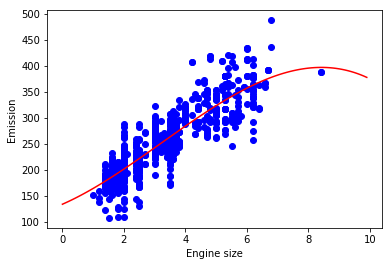

In [27]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly2, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+ clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
test_x_poly2 = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.07
Residual sum of squares (MSE): 844.63
R2-score: 0.74


Coefficients:  [[ 0.         25.93983273  4.96189408 -0.51453782]]
Intercept:  [134.299776]
Mean absolute error: 22.07
Residual sum of squares (MSE): 844.63
R2-score: 0.74


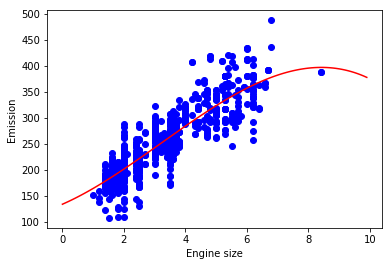

In [30]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )